# Winning in the UFC

**By Shane Dugan and Erik Schmidt**

## Introduction

The Ultimate Fighting Championship (UFC) first premiered on March 11, 1993. The basic premise of the first event was to determine which style of fighting is superior. There were fighters representing boxing, wrestling, kickboxing, Brazilian Jiu Jitsu, and many more martial arts all competing to show that their method of fighting was superior. Ultimately Brazilian Jiu Jitsu was superior, and since then, the sport of Mixed Martial Arts has grown and evolved into a worldwide spectacle. Currently, you won't find fighters that only focus in one martial art. The fighters that participate have evolved to incorporate a variety of different styles into their arsenal in order to maximize their skill set. The main styles of martial arts practiced by fighter today include, Brazilian Jiu Jitsu, wrestling, boxing, and Muay Thai. This makes predicting who has a better chance of winning much more complicated than it was compared to back in 1993. The variety of styles and disciplines interfuse and make it very difficult for the average viewer to predict who is the winner. In the UFC, a fighter can win through 3 different methods: a submission, where the opponent either concedes, or is finished by the submission; a knockout/technical knockout, where the opponent is deemed unconcious or incoherent; or through a judges decision.

In this tutorial, we would like to use stats collected by a dataset retrieved from kaggle.com to try and predict who will be the victor in a fight based on their prior stats, including both fighters win ratios, reach, height, prefered stance, and others.

## Getting Started
In this project, we used Python 3, with some imported libraries. The libraries we used were [pandas](https://pandas.pydata.org/pandas-docs/stable/), [numpy](numpy.org), [scikit-learn](https://scikit-learn.org/stable/index.html), [matplotlib](https://matplotlib.org/contents.html), and [seaborn](https://seaborn.pydata.org/).

In [129]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [115]:
fights = pd.read_csv("data.csv", sep=',')
fights = fights.head(n = 4000)
fights

,R_fighter,B_fighter,date,Winner,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_longest_win_streak,...,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,B_avg_SIG_STR_pct,R_avg_SIG_STR_pct
0,Henry Cejudo,Marlon Moraes,6/8/2019,Red,Bantamweight,5,0,4,0,4,...,0,8,Orthodox,162.56,162.56,135.0,31.0,32.0,0.466000,0.466000
1,Valentina Shevchenko,Jessica Eye,6/8/2019,Red,Women's Flyweight,5,0,3,0,3,...,0,5,Southpaw,165.10,167.64,125.0,32.0,31.0,0.399000,0.575714
2,Tony Ferguson,Donald Cerrone,6/8/2019,Red,Lightweight,3,0,3,0,8,...,1,14,Orthodox,180.34,193.04,155.0,36.0,35.0,0.496129,0.430000
3,Jimmie Rivera,Petr Yan,6/8/2019,Blue,Bantamweight,3,0,4,0,4,...,0,6,Orthodox,162.56,172.72,135.0,26.0,29.0,0.550000,0.366250
4,Tai Tuivasa,Blagoy Ivanov,6/8/2019,Blue,Heavyweight,3,0,1,0,1,...,0,3,Southpaw,187.96,190.50,264.0,32.0,26.0,0.310000,0.545000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Jon Fitch,Paulo Thiago,7/11/2009,Red,Welterweight,3,0,1,0,1,...,0,9,Orthodox,182.88,193.04,170.0,28.0,31.0,0.290000,0.523000
3996,Brock Lesnar,Frank Mir,7/11/2009,Red,Heavyweight,5,0,3,0,4,...,0,2,Orthodox,190.50,205.74,265.0,30.0,31.0,0.543846,0.750000
3997,Georges St-Pierre,Thiago Alves,7/11/2009,Red,Welterweight,5,0,7,0,7,...,0,12,Orthodox,180.34,193.04,185.0,25.0,28.0,0.524545,0.585714
3998,Dan Henderson,Michael Bisping,7/11/2009,Red,Middleweight,3,0,3,0,4,...,0,4,Orthodox,180.34,187.96,185.0,30.0,38.0,0.480000,0.545000


The dataset we found was pulled from [Kaggle](kaggle.com), which is a site that allows its users to upload and share datasets, projects, and compete in data science challenges. The dataset is a CSV (Comma Separated Value) file, which contains almost every fight in the UFC from March 1993 till June 2019. The actual data can be found [here](https://www.kaggle.com/rajeevw/ufcdata).

## Data Pre-processing
The dataset itself had a lot of columns that we did not need and that were duplicates. The dataset is organized with information about the fight coming first, then about each fighter, labeld Red (R) and Blue (B). From the general fight information, we deleted columns referee, location, and title_bout, because they were not useful to our analysis. For each fighter the column types `BODY, CLINCH, DISTANCE, GROUND, HEAD, KD, LEG, PASS, REV, SIG_STR, SUB_ATT, TD, TD_pct`, and `TOTAL_STR` were not only not needed, but also duplicated in the `avg_opp_` columns. In addition to those, we also deleted the columns `total_rounds_fought, total_time_fought(seconds)`, and `total_title_bouts`, as they were not relevant to the analysis. We went from 145 columns down to 42. 

## The Data Itself
In the dataset, each row represents a fight. For each fight, listed is the Red fighter, Blue figther, date, winner, weight class, and number of rounds. For each of the fighters (R, B) is listed their stats at the time of the fight. `R_` represents red corner while `B_` represents blue corner. After the data that was dropped, the columns that were left were those containing general stats about the fighter before the round. These include:
1. `current_lose_streak`: Losing streak of the fighter
2. `current_win_streak`: Winning streak of the fighter
3. `draw`: Number of draws in the fighter's career
4. `longest_win_streak`: Longest win streak of the fighter
5. `losses`: Number of losses overall
6. `win_by_Decision_Majority`: Number of fights won by majority judges decision
7. `win_by_Decision_Split`: Number of fights won by split judges decision
8. `win_by_Decision_Unanimous`: Number of fights won by unanimous judges decision
9. `win_by_KO/TKO`: Wins by knockout
10. `win_by_Submission`: Wins by submission
11. `win_by_TKO_Doctor_Stoppage`: Wins by doctor stoppage
12. `wins`: Total wins of the fighter
13. `Stance`: Stance of the fighter
14. `Height_cms`: Height in centimeters of the fighter
15. `Reach_cms`: Arm span in centimeters of the fighter
16. `Weight_lbs`: Weight in pounds of the fighter
17. `age`: Age of the fighter
18. `avg_SIG_STR_pct`: Percentage of significant strikes by the fighter

In [116]:
blue = ['B_fighter', 'weight_class', 'B_current_lose_streak', 'B_current_win_streak', 'B_draw', 'B_longest_win_streak',\
        'B_losses', 'B_win_by_Decision_Majority', 'B_win_by_Decision_Split', 'B_win_by_Decision_Unanimous',\
       'B_win_by_KO/TKO', 'B_win_by_Submission', 'B_win_by_TKO_Doctor_Stoppage', 'B_wins', 'B_Stance',\
       'B_Height_cms', 'B_Reach_cms', 'B_Weight_lbs', 'B_age', 'B_avg_SIG_STR_pct']
red = ['R_fighter', 'weight_class', 'R_current_lose_streak', 'R_current_win_streak', 'R_draw', 'R_longest_win_streak',\
        'R_losses', 'R_win_by_Decision_Majority', 'R_win_by_Decision_Split', 'R_win_by_Decision_Unanimous',\
       'R_win_by_KO/TKO', 'R_win_by_Submission', 'R_win_by_TKO_Doctor_Stoppage', 'R_wins', 'R_Stance',\
       'R_Height_cms', 'R_Reach_cms', 'R_Weight_lbs', 'R_age', 'R_avg_SIG_STR_pct']

r_win = []
b_win = []
for index, row in fights.iterrows():
    if row['Winner'] == 'Red':
        r_win.append(True)
        b_win.append(False)
    elif row['Winner'] == 'Blue':
        r_win.append(False)
        b_win.append(True)
    else:
        r_win.append(False)
        b_win.append(False)

columns = ['name', 'weight_class', 'current_lose_streak', 'current_win_streak', 'draw', 'longest_win_streak',\
        'losses', 'win_by_Decision_Majority', 'win_by_Decision_Split', 'win_by_Decision_Unanimous',\
       'win_by_KO/TKO', 'win_by_Submission', 'win_by_TKO_Doctor_Stoppage', 'wins', 'Stance',\
       'Height_cms', 'Reach_cms', 'Weight_lbs', 'age', 'avg_SIG_STR_pct', 'won']

B_fights = pd.DataFrame(data = fights, columns = blue)
R_fights = pd.DataFrame(data = fights, columns = red)
B_fights['won'] = b_win
R_fights['won'] = r_win
B_fights.columns = columns
R_fights.columns = columns
fights2 = B_fights.copy()
fights2 = fights2.append(R_fights)
fights2 = fights2.reset_index(drop = True)

win_ratio = []
win_by_KO_pct = []
win_by_Submission_pct = []
for index, row in fights2.iterrows():
    KO = row['win_by_KO/TKO'] + row['win_by_TKO_Doctor_Stoppage']
    fght = row['wins'] + row['draw'] + row['losses']
    if (fght != 0):
        win_ratio.append(row['wins']/fght)
    else:
        win_ratio.append(0.0)
    if row['wins'] != 0:
        win_by_KO_pct.append(KO/row['wins'])
        win_by_Submission_pct.append(row['win_by_Submission']/row['wins'])
    else:
        win_by_KO_pct.append(0)
        win_by_Submission_pct.append(0)    
fights2['win_ratio'] = win_ratio
fights2['win_by_KO_pct'] = win_by_KO_pct
fights2['win_by_Submission_pct'] = win_by_Submission_pct

fights2 = fights2[fights2.Stance != 'Open Stance']

fights3 = fights2.copy()
fights3 = fights3[fights3.win_ratio != 0.0]
fights3 = fights3.reset_index(drop = True)
fights3

,name,weight_class,current_lose_streak,current_win_streak,draw,longest_win_streak,losses,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,...,Stance,Height_cms,Reach_cms,Weight_lbs,age,avg_SIG_STR_pct,won,win_ratio,win_by_KO_pct,win_by_Submission_pct
0,Marlon Moraes,Bantamweight,0,4,0,4,1,0,1,0,...,Orthodox,167.64,170.18,135.0,31.0,0.466000,False,0.800000,0.500000,0.250000
1,Jessica Eye,Women's Flyweight,0,3,0,3,6,0,2,1,...,Orthodox,167.64,167.64,125.0,32.0,0.399000,False,0.400000,0.250000,0.000000
2,Donald Cerrone,Lightweight,0,3,0,8,8,0,0,7,...,Orthodox,185.42,185.42,155.0,36.0,0.496129,False,0.741935,0.434783,0.260870
3,Petr Yan,Bantamweight,0,4,0,4,0,0,0,2,...,Switch,170.18,170.18,135.0,26.0,0.550000,True,1.000000,0.500000,0.000000
4,Blagoy Ivanov,Heavyweight,0,1,0,1,1,0,0,1,...,Southpaw,180.34,185.42,250.0,32.0,0.310000,True,0.500000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5986,George Sotiropoulos,Lightweight,0,2,0,2,0,0,0,0,...,Orthodox,177.80,180.34,155.0,32.0,0.630000,True,1.000000,0.500000,0.500000
5987,Jon Fitch,Welterweight,0,1,0,8,1,0,1,4,...,Orthodox,182.88,193.04,170.0,31.0,0.523000,True,0.900000,0.111111,0.333333
5988,Brock Lesnar,Heavyweight,0,2,0,2,1,0,0,1,...,Orthodox,190.50,205.74,265.0,31.0,0.750000,True,0.666667,0.500000,0.000000
5989,Georges St-Pierre,Welterweight,0,5,0,5,2,0,1,4,...,Orthodox,180.34,193.04,185.0,28.0,0.585714,True,0.857143,0.416667,0.166667


## Tidying Up
In order to aid in data analysis, we first only used the first 4000 rows, which dropped around 1100 rows that had data that had a lot of missing values. This effectively gives us the data from the past 10 years. Then, we decided to create two separate dataframes, with each fighter from each fight. We split up the data by blue or red corner, and created a new dataframe with all the information for each fighter, plus the name of the fighter, in two dataframes, called B_fights and R_fights. We also went through each row and created an array of booleans for each side, which represented whether or not the fighter on that side one, and appended those arrays to their corresponding dataframes.

We then renamed all the columns in these two fighter dataframes to be the same, by removing the `B_` and `R_` prefixes. Once the column names were the same, we appended them together under a new dataframe, fights2. We also noticed that there were a few columns with the Stance "Open Stance", and decided to delete those as they were skewing some of the data. We also created a new dataframe that contains no fighters with 0% win rate, as these were likely the stats for fighters who had just started out, therefore skewing the data.

# Exploratory Data Analysis

Before we did any EDA (Exploratory Data Analysis), we had to add a few more columns for ease of plotting data. The first column we added was wins/# of fights. We found number of fights by adding the draw, wins, and losses columns, then divided wins by that number. 

We then plotted age vs. win ratio on a bar plot. This plot shows that the younger the fighter, the higher their win ratio. This would make sense, as the younger the fighter, the better they are able to perform.

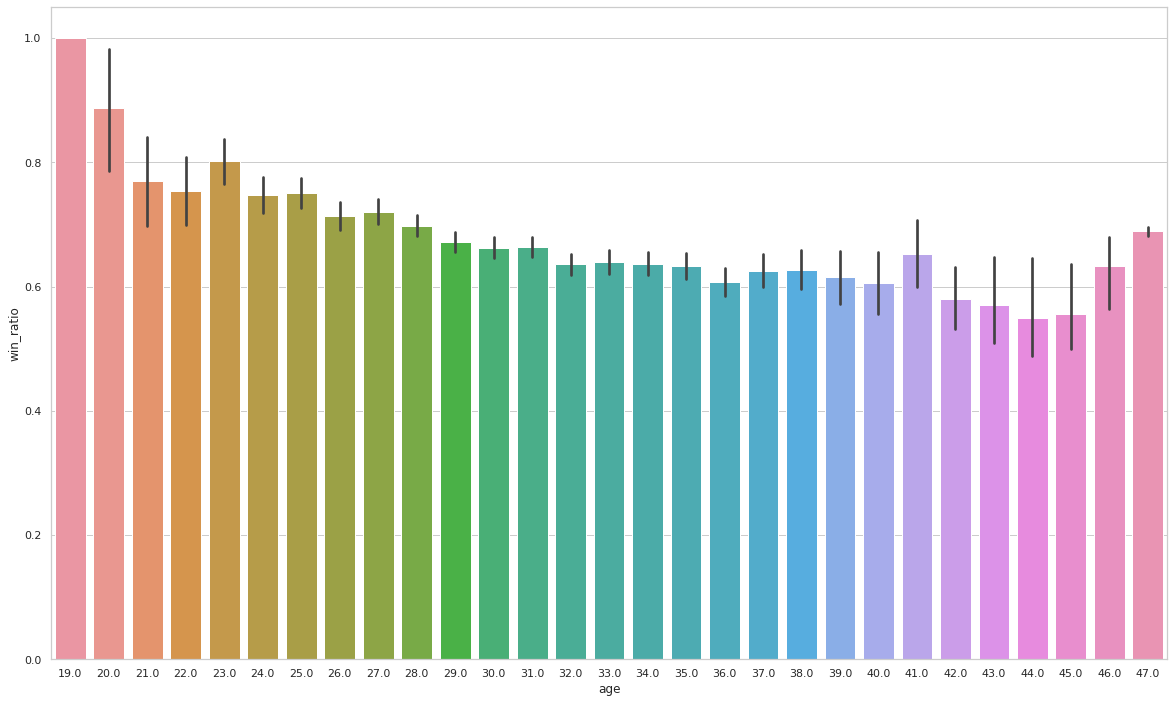

In [117]:
fig, ax = plt.subplots(figsize = (20, 12))
sns.set(style = "whitegrid")
ax = sns.barplot(x = "age", y = "win_ratio", data = fights3, ax = ax)

Then a bar plot for stance vs. win ratio. This plot shows that the `Switch` stance often have a higher win ratio than the other two stances.

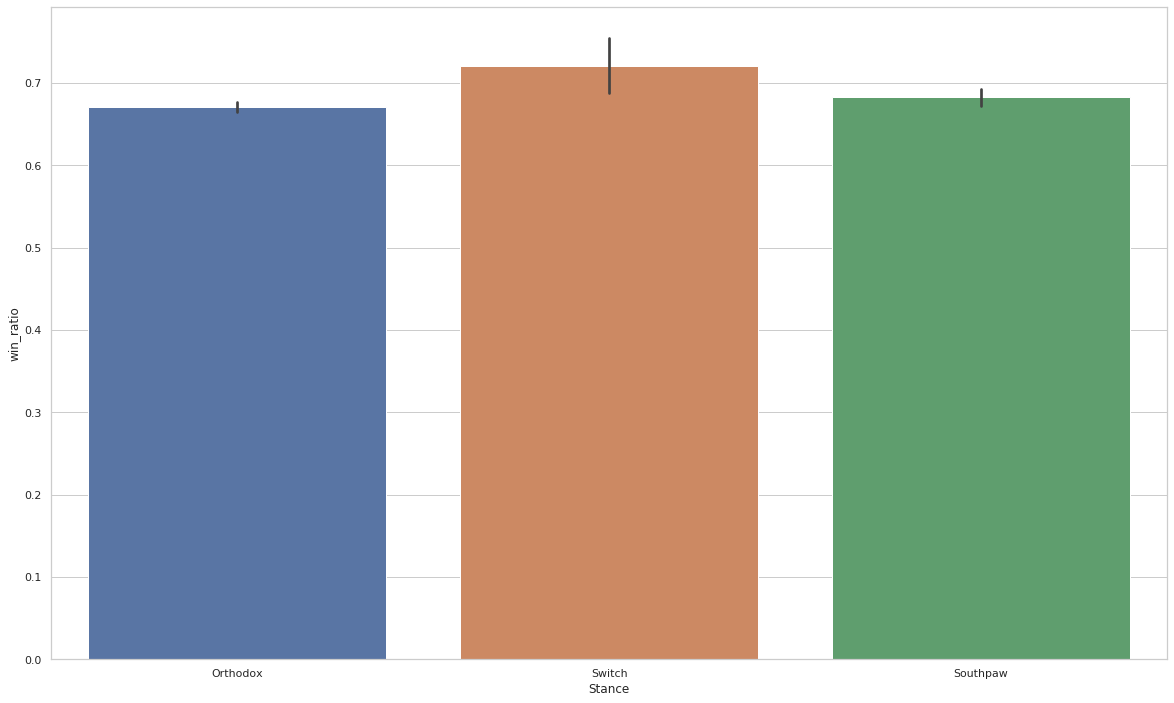

In [118]:
fig, ax = plt.subplots(figsize = (20, 12))
sns.set(style = "whitegrid")
ax = sns.barplot(x = "Stance", y = "win_ratio", data = fights3, ax = ax)

Then a bar plot for longest win streak vs. win ratio. This shows that the higher the current win streak of the fighter, the higher their win ratio usually is. This doesn't really reveal anything groundbreaking (someone who is currently on a high win streak has clearly won a lot of games, duh.), but it is interesting to see the distribution. 

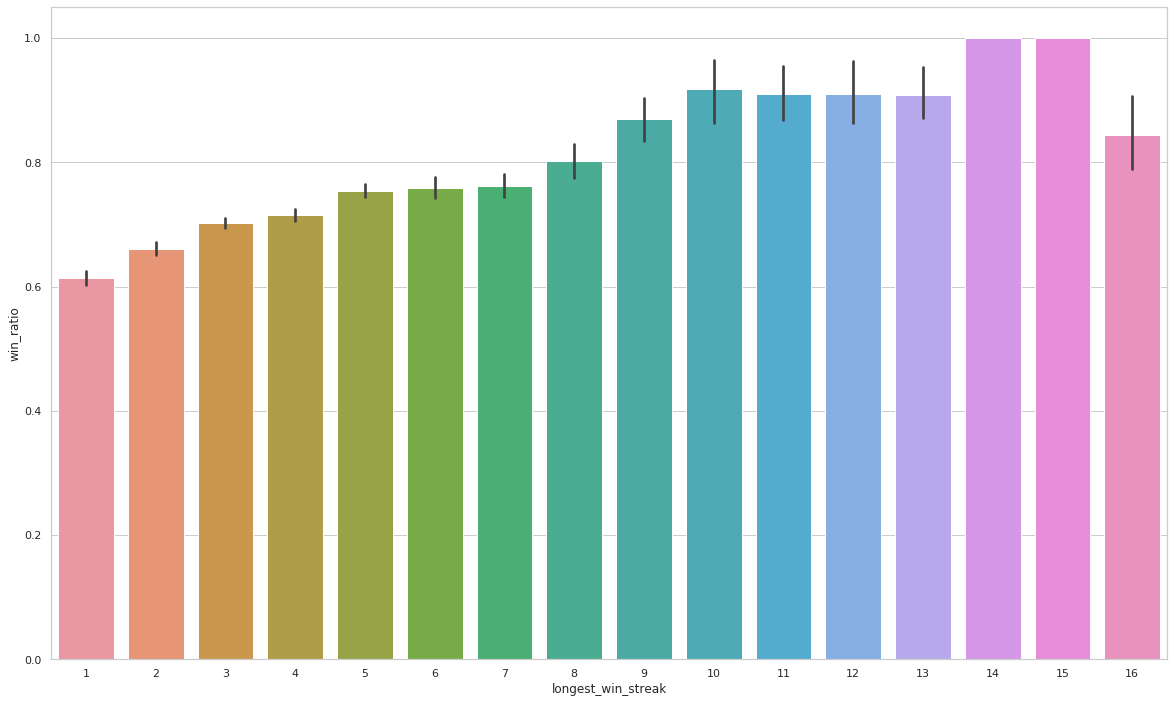

In [119]:
fig, ax = plt.subplots(figsize = (20, 12))
sns.set(style = "whitegrid")
ax = sns.barplot(x = "longest_win_streak", y = "win_ratio", data = fights3, ax = ax)

In order to compare things like weight or height and significant strike percentage, we need to analyze based on weight class. This is due to the fact that in each weight class, the fighters are going to be more similar, which will amplify the differences in things like weight and height. We then split up the dataframe of data from all fighters into a few dataframes that represented fighters in the same weight class. We chose welterweight, middleweight, light heavyweight, and heavyweight to see how the win ratio of these fighters varied based on things like height and weight, which are somewhat indicative of their weight class.

For each weight class we plotted the fighters reach in centimeters vs. their significant strike percentage. Some of the classes (such as light heavyweights) show a definite trend upwards as reach increases, while others (such as welterweights) show no trend.


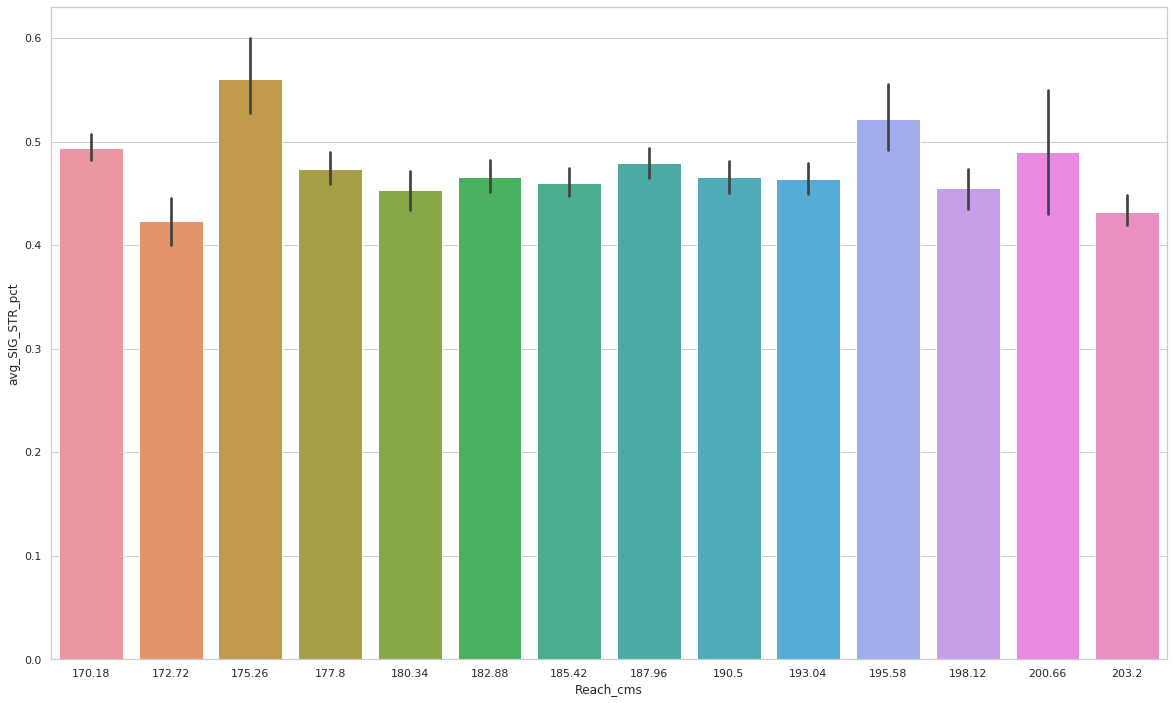

In [120]:
Welterweights = fights3[fights3.weight_class == "Welterweight"]
Middleweights = fights3[fights3.weight_class == "Middleweight"]
Light_Heavyweights = fights3[fights3.weight_class == "Light Heavyweight"]
Heavyweights = fights3[fights3.weight_class == "Heavyweight"]


fig, ax = plt.subplots(figsize = (20, 12))
sns.set(style = "whitegrid")
ax = sns.barplot(x = "Reach_cms", y = "avg_SIG_STR_pct", data = Welterweights, ax = ax)

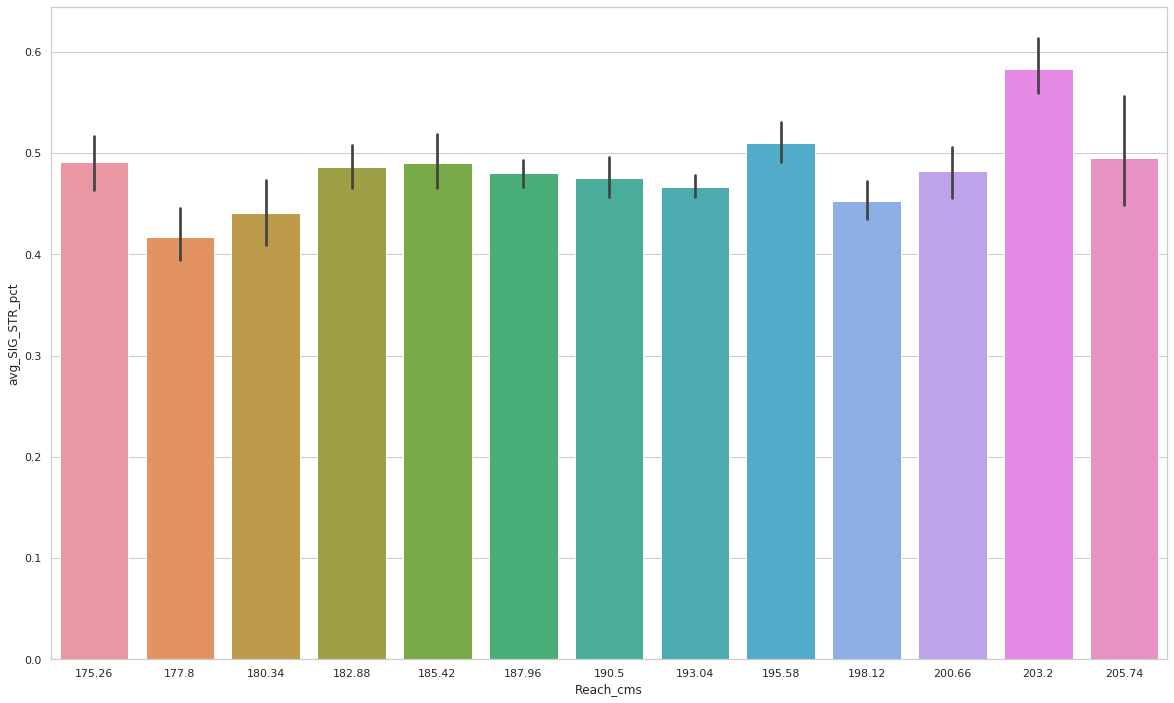

In [121]:
fig, ax = plt.subplots(figsize = (20, 12))
sns.set(style = "whitegrid")
ax = sns.barplot(x = "Reach_cms", y = "avg_SIG_STR_pct", data = Middleweights, ax = ax)

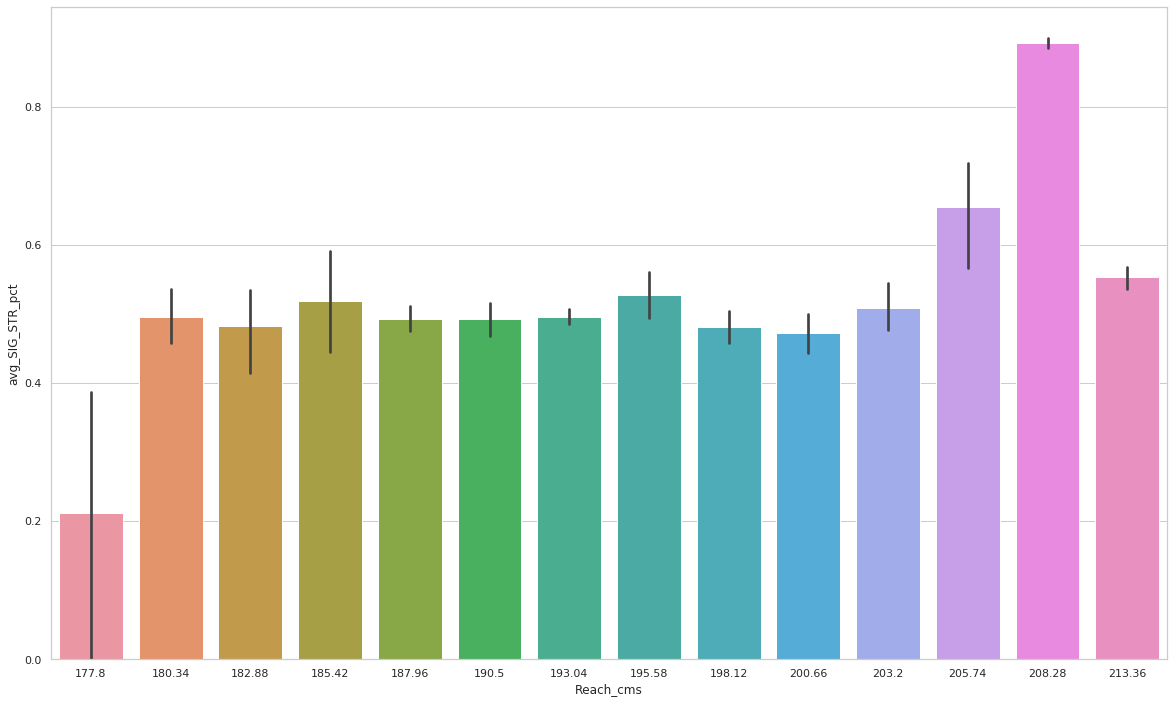

In [122]:
fig, ax = plt.subplots(figsize = (20, 12))
sns.set(style = "whitegrid")
ax = sns.barplot(x = "Reach_cms", y = "avg_SIG_STR_pct", data = Light_Heavyweights, ax = ax)

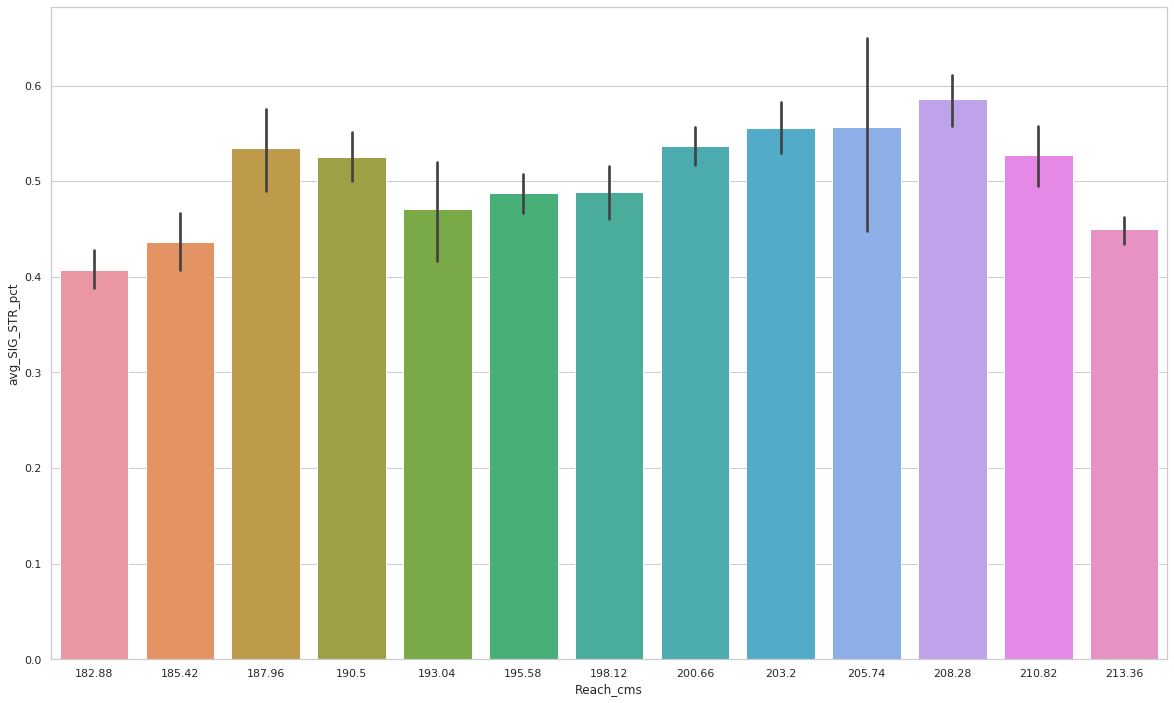

In [123]:
fig, ax = plt.subplots(figsize = (20, 12))
sns.set(style = "whitegrid")
ax = sns.barplot(x = "Reach_cms", y = "avg_SIG_STR_pct", data = Heavyweights, ax = ax)

The last thing we plotted was a histogram of the win ratios. There is a spike in the range from .5 to .6. 

(array([   0.,   10.,  122.,  323.,  277., 1680., 1149.,  799.,  478.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 <a list of 9 Patch objects>)

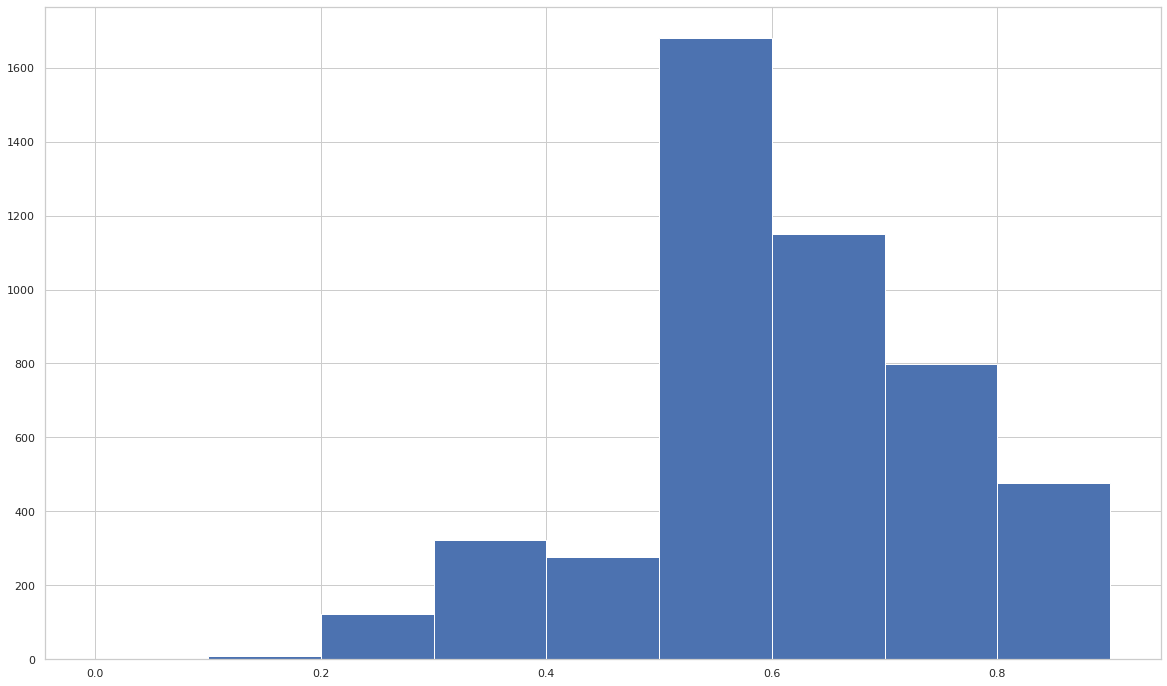

In [153]:
fig, ax = plt.subplots(figsize = (20, 12))
plt.hist(x = fights3['win_ratio'], bins = np.arange(start = 0, stop = 1, step = 0.1))

# Predictions Based On Fighter Statistics

In this section, we will analyze the potential to predict both win ratio and outcome of a fight. Using linear regression, we will try to predict winning ratio, and analyze which stats best predict this. Then, using logistic regression, we will try to predict the outcome of a fight based on certain stats of the two fighters, and analyze which stats best predict this. 

## Linear Regression: Can We Predict Winning Ratio?
Before doing any linear regression, we needed to transform the stance of the fighters into an encoded variable, in order to be able to use it in linear regression. After doing so, we chose a few statistics to try to predict with: stance (encoded), height, reach, and age. 
### Null Hypothesis for Winning Ratio:
The set of four stats: stance, height, reach, and age, do not affect the winning ratio. 

In [138]:
fights4 = fights3.copy()
fights4 = fights4.dropna()
le = LabelEncoder()
le.fit(["Orthodox", "Southpaw", "Switch"])
encoded_stance = le.transform(fights4['Stance'])
fights4['encoded_stance'] = encoded_stance

stats = ["encoded_stance", "Height_cms", "Reach_cms", "age"]
fighter_stats = fights4[stats]
fighter_stats

,encoded_stance,Height_cms,Reach_cms,age
0,0,167.64,170.18,31.0
1,0,167.64,167.64,32.0
2,0,185.42,185.42,36.0
3,2,170.18,170.18,26.0
4,1,180.34,185.42,32.0
...,...,...,...,...
5986,0,177.80,180.34,32.0
5987,0,182.88,193.04,31.0
5988,0,190.50,205.74,31.0
5989,0,180.34,193.04,28.0


In [126]:
x = fighter_stats
y = fights4['win_ratio']
lr = LinearRegression()
model = lr.fit(x, y)
lr.score(x, y)

0.045420135626618514

We fit the model to the data and found that this model has an R-square value of .04, which means this model does not describe the variance for winning ratio. This means we accept the null hypothesis.

In [128]:
rating_coeffs = lr.coef_.tolist()
for stat, coef in zip(stats, rating_coeffs):
    print("Stat: {}, Coefficient: {}".format(stat, coef))

Stat: encoded_stance, Coefficient: 0.015981084038739397
Stat: Height_cms, Coefficient: -0.00171906042518197
Stat: Reach_cms, Coefficient: 0.0023987006597275483
Stat: age, Coefficient: -0.010316108764445765


Here is the coefficients for each of the statistics. We cannot draw any conclusions from this, as this model does not predict the values at all. 

## Logistic Regression: Can We Predict the Outcome of a Fight?
Before we were able to do logistic regression, we had to do a bit of manipulation on the original dataframe of all fights. We first dropped all rows that had some value of NaN (not a number), as the stance columns had a couple of rows that had NaN in them. We then removed all rows with the stance Open Stance, as these entries were so few that they skewed the data. 
We then encoded the stances as we did in linear regression, except for both the Red and Blue fighters. We also encoded the winner of the fight as Red -> 0, Blue -> 1, and dropped any Draws. Lastly, we computed the win ratio for both the Red and Blue fighters, and dropped any rows where the win ratio was 0.

In [152]:
fights5 = fights.copy()
fights5 = fights5.dropna()
fights5 = fights5[fights5.B_Stance != "Open Stance"]
fights5 = fights5[fights5.R_Stance != "Open Stance"]
B_encoded_stance = le.transform(fights5['B_Stance'])
R_encoded_stance = le.transform(fights5['R_Stance'])

fights5['B_encoded_stance'] = B_encoded_stance
fights5['R_encoded_stance'] = R_encoded_stance

le2 = LabelEncoder()
le2.fit(["Red", "Blue"])
fights5 = fights5[fights5.Winner != "Draw"]
encoded_winner = le2.transform(fights5['Winner'])
fights5['encoded_winner'] = encoded_winner

B_win_ratio = []
R_win_ratio = []
for index, row in fights5.iterrows():
    B_fght = row['B_wins'] + row['B_draw'] + row['B_losses']
    R_fght = row['R_wins'] + row['R_draw'] + row['R_losses']
    if (B_fght != 0):
        B_win_ratio.append(row['B_wins']/B_fght)
    else:
        B_win_ratio.append(0.0)
    if (R_fght != 0):
        R_win_ratio.append(row['R_wins']/R_fght)
    else:
        R_win_ratio.append(0.0)
fights5['B_win_ratio'] = B_win_ratio
fights5['R_win_ratio'] = R_win_ratio

fights5 = fights5[fights5.B_win_ratio != 0.0]
fights5 = fights5[fights5.R_win_ratio != 0.0]

fights5

,R_fighter,B_fighter,date,Winner,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_longest_win_streak,...,R_Weight_lbs,B_age,R_age,B_avg_SIG_STR_pct,R_avg_SIG_STR_pct,B_encoded_stance,R_encoded_stance,encoded_winner,B_win_ratio,R_win_ratio
0,Henry Cejudo,Marlon Moraes,6/8/2019,Red,Bantamweight,5,0,4,0,4,...,135.0,31.0,32.0,0.466000,0.466000,0,0,1,0.800000,0.800000
1,Valentina Shevchenko,Jessica Eye,6/8/2019,Red,Women's Flyweight,5,0,3,0,3,...,125.0,32.0,31.0,0.399000,0.575714,0,1,1,0.400000,0.714286
2,Tony Ferguson,Donald Cerrone,6/8/2019,Red,Lightweight,3,0,3,0,8,...,155.0,36.0,35.0,0.496129,0.430000,0,0,1,0.741935,0.933333
3,Jimmie Rivera,Petr Yan,6/8/2019,Blue,Bantamweight,3,0,4,0,4,...,135.0,26.0,29.0,0.550000,0.366250,2,0,0,1.000000,0.750000
4,Tai Tuivasa,Blagoy Ivanov,6/8/2019,Blue,Heavyweight,3,0,1,0,1,...,264.0,32.0,26.0,0.310000,0.545000,1,1,0,0.500000,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,George Sotiropoulos,George Roop,8/8/2009,Red,Lightweight,3,0,1,0,1,...,155.0,27.0,32.0,0.275000,0.630000,0,0,1,0.500000,1.000000
3995,Jon Fitch,Paulo Thiago,7/11/2009,Red,Welterweight,3,0,1,0,1,...,170.0,28.0,31.0,0.290000,0.523000,0,0,1,1.000000,0.900000
3996,Brock Lesnar,Frank Mir,7/11/2009,Red,Heavyweight,5,0,3,0,4,...,265.0,30.0,31.0,0.543846,0.750000,1,0,1,0.769231,0.666667
3997,Georges St-Pierre,Thiago Alves,7/11/2009,Red,Welterweight,5,0,7,0,7,...,185.0,25.0,28.0,0.524545,0.585714,0,0,1,0.818182,0.857143


We chose the stats stance (encoded), height, reach, age, and win ratio for both fighters as the independent variables of the regression, and the encoded winner as the dependend variable.

### Null Hypothesis for Outcome:
The set of 5 stats for each fighter in a fight do not affect the outcome of a fight: stance, height, reach, age, and win ratio.

In [146]:
stats = ["B_encoded_stance", "B_Height_cms", "B_Reach_cms", "B_age", "B_win_ratio", "R_encoded_stance",\
         "R_Height_cms", "R_Reach_cms", "R_age", "R_win_ratio"]
fighter_stats = fights5[stats]
fighter_stats

x = fighter_stats
y = fights5['encoded_winner']
lr = LogisticRegression()
model = lr.fit(x, y)
lr.score(x, y)

0.605006364022062

We fit the model to the data and found that this model has an R-squared of .61, which means this model predics the outcome of a fight fairly well. This means we reject the null hypothesis. 

In [149]:
rating_coeffs = lr.coef_[0].tolist()
for stat, coef in zip(fighter_stats, rating_coeffs):
    print("Stat: {}, Coefficient: {}".format(stat, coef))

Stat: B_encoded_stance, Coefficient: -0.08529378550641614
Stat: B_Height_cms, Coefficient: 0.015362312616847227
Stat: B_Reach_cms, Coefficient: -0.018093308253343873
Stat: B_age, Coefficient: 0.0762790350084375
Stat: B_win_ratio, Coefficient: -0.28762072590755255
Stat: R_encoded_stance, Coefficient: 0.10614395124735776
Stat: R_Height_cms, Coefficient: -0.019988704173974955
Stat: R_Reach_cms, Coefficient: 0.019077211922674395
Stat: R_age, Coefficient: -0.06230404638908249
Stat: R_win_ratio, Coefficient: 0.7405461486232735


Here is listed the statistics and their coefficients. It appears that for both corners, win ratio has the greatest effect on the outcome of the fight. 

# Conclusion
## On Predictions of Win Ratio and Fight Outcome
We found that we can predict the fight outcome with some accuracy. There is room for improvement, however, so there are likely some interaction terms that would help with prediction.
We found that the model for predicting win ratio does not seem to predict the win ratio at all. There are likely other factors that could be used, or interaction terms that would likely predict much better. 